<a href="https://colab.research.google.com/github/nurniahamid/Submission/blob/main/analisis_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike-sharing-dataset.zip
- **Nama:** Nurnia Hamid
- **Email:** A309XAF385@devacademy.id
- **ID Dicoding:** A309XAF385

## Menentukan Pertanyaan Bisnis

1. Kapan waktu penyewaan sepeda paling tinggi dan paling rendah?
2. Bagaimana pola penyewaan sepeda berdasarkan musim dan cuaca?
3. Bagaimana pengaruh hari kerja vs hari libur terhadap jumlah penyewaan sepeda?
4. Apakah ada hubungan antara suhu, kelembapan, dan kecepatan angin terhadap jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
Day_df = pd.read_csv("https://raw.githubusercontent.com/nurniahamid/Submission/refs/heads/main/Data/day.csv")
Day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
Hour_df = pd.read_csv("https://raw.githubusercontent.com/nurniahamid/Submission/refs/heads/main/Data/hour.csv")
Hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Day_df = Data peminjaman sepeda berdasarkan hari
- Hour_df = Data Peminjaman berdasarkan jam



### Assessing Data

In [5]:
#Menilai data Day_df

Day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


- untuk tipe data kolom dteday harusnya bertipe Datetime
- Data season, waethersit, weekday, holiday, workingday akan diubah ke bentuk data kategori

In [6]:
print("Jumlah duplikasi: ", Day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
Day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [8]:
Day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
Day_df.isnull().sum()
Day_df[Day_df['hum'] == 0]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.0,0.261877,46,577,623


- kolom season, yr, mnth, holiday, weekday, wrokingday, weathersit, tidak ada outlier karena semua dalam rentang yang benar
- Data hum memiliki min 0, artinya ada data yang memiliki kelembapatan 0% ini merupakan inacurate value

In [10]:
#Menilai data Hour_df

Hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- untuk tipe data kolom dteday harusnya bertipe Datetime
- Data season, waethersit, weekday, holiday, workingday akan diubah ke bentuk data kategori

In [11]:
print("Jumlah duplikasi: ", Hour_df.duplicated().sum())
Hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [12]:
Hour_df.isnull().sum()
Hour_df[Hour_df['hum'] == 0]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1551,1552,2011-03-10,1,0,3,0,0,4,1,3,0.34,0.3182,0.0,0.2537,3,0,3
1552,1553,2011-03-10,1,0,3,1,0,4,1,3,0.34,0.3182,0.0,0.2537,0,2,2
1553,1554,2011-03-10,1,0,3,2,0,4,1,3,0.34,0.3182,0.0,0.2537,0,1,1
1554,1555,2011-03-10,1,0,3,5,0,4,1,3,0.36,0.3485,0.0,0.1940,1,2,3
1555,1556,2011-03-10,1,0,3,6,0,4,1,3,0.36,0.3333,0.0,0.3284,0,12,12
1556,1557,2011-03-10,1,0,3,7,0,4,1,3,0.38,0.3939,0.0,0.2239,1,36,37
1557,1558,2011-03-10,1,0,3,8,0,4,1,3,0.38,0.3939,0.0,0.2836,1,43,44
1558,1559,2011-03-10,1,0,3,9,0,4,1,3,0.40,0.4091,0.0,0.2239,1,23,24
1559,1560,2011-03-10,1,0,3,10,0,4,1,3,0.40,0.4091,0.0,0.1642,0,17,17
1560,1561,2011-03-10,1,0,3,11,0,4,1,3,0.40,0.4091,0.0,0.2537,6,5,11


In [13]:
Hour_df[(Hour_df['casual'] == 0) & (Hour_df['registered'] == 0)][['dteday', 'hr', 'casual', 'registered', 'cnt']]

,dteday,hr,casual,registered,cnt


**Insight:**
- untuk tipe data kolom dteday harusnya bertipe Datetime
- kelembapan masih banyak yg 0%, sangat tidak mungkin


### Cleaning Data

In [14]:
from datetime import datetime

#mengubah tipe data kolom dteday
datetime_columns = ["dteday"]

for column in datetime_columns :
    Day_df[column] = pd.to_datetime(Day_df[column])

categorical_columns = ["season", "weathersit","weekday","holiday","workingday"]

for column in categorical_columns :
  Day_df[column] = Day_df[column].astype('category')


In [15]:
Day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(5), datetime64

In [16]:
Day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [17]:
Day_df[Day_df.hum == Day_df.hum.min()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.0,0.261877,46,577,623


In [18]:
Day_df['hum'] = Day_df['hum'].replace(0, Day_df['hum'].median())

In [19]:
print("Jumlah nilai 0 di kolom hum:", (Day_df['hum'] == 0).sum())

Jumlah nilai 0 di kolom hum: 0


In [20]:
print(Day_df['hum'].unique())

[0.805833 0.696087 0.437273 0.590435 0.436957 0.518261 0.498696 0.535833
 0.434167 0.482917 0.686364 0.599545 0.470417 0.537826 0.49875  0.48375
 0.5375   0.861667 0.741739 0.538333 0.457083 0.4      0.436522 0.491739
 0.616957 0.8625   0.6875   0.793043 0.651739 0.722174 0.60375  0.829565
 0.775417 0.437826 0.585217 0.929167 0.568333 0.738333 0.537917 0.494783
 0.437391 0.506364 0.544167 0.457391 0.375833 0.314348 0.423478 0.505
 0.516667 0.187917 0.407826 0.605    0.577778 0.423043 0.697391 0.712174
 0.68     0.876364 0.535    0.449583 0.318333 0.610417 0.789167 0.948261
 0.551304 0.420833 0.626667 0.649565 0.594583 0.527391 0.496957 0.655652
 0.776522 0.602917 0.525217 0.379167 0.47375  0.737391 0.624583 0.839565
 0.495    0.394167 0.493913 0.302174 0.314167 0.646667 0.918333 0.68625
 0.65375  0.48     0.42625  0.642083 0.470833 0.83625  0.8775   0.8575
 0.716956 0.739167 0.819167 0.540417 0.67125  0.888333 0.479583 0.5425
 0.665833 0.614167 0.407083 0.729583 0.887917 0.810833 0.776

In [21]:
Day_df.describe()

,instant,dteday,yr,mnth,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.500684,6.519836,0.495385,0.474354,0.628751,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.000000,4.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,1.000000,7.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,1.000000,10.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,1.000000,12.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.500342,3.451913,0.183051,0.162961,0.140518,0.077498,686.622488,1560.256377,1937.211452


In [22]:
from datetime import datetime
#Membersihkan Data Hour

#mengubah tipe data kolom dteday
datetime_columns = ["dteday"]

for column in datetime_columns :
    Hour_df[column] = pd.to_datetime(Hour_df[column])

#mengubag data season, yr, mnth, holiday, weekday, workingday dan weathersit jadi data kategori
categorical_columns = ["season", "weathersit","weekday","holiday","workingday"]

for column in categorical_columns:
    Hour_df[column] = pd.Categorical(Hour_df[column])

In [23]:
Hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [24]:
Hour_df[Hour_df.hum == Hour_df.hum.min()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1551,1552,2011-03-10,1,0,3,0,0,4,1,3,0.34,0.3182,0.0,0.2537,3,0,3
1552,1553,2011-03-10,1,0,3,1,0,4,1,3,0.34,0.3182,0.0,0.2537,0,2,2
1553,1554,2011-03-10,1,0,3,2,0,4,1,3,0.34,0.3182,0.0,0.2537,0,1,1
1554,1555,2011-03-10,1,0,3,5,0,4,1,3,0.36,0.3485,0.0,0.1940,1,2,3
1555,1556,2011-03-10,1,0,3,6,0,4,1,3,0.36,0.3333,0.0,0.3284,0,12,12
1556,1557,2011-03-10,1,0,3,7,0,4,1,3,0.38,0.3939,0.0,0.2239,1,36,37
1557,1558,2011-03-10,1,0,3,8,0,4,1,3,0.38,0.3939,0.0,0.2836,1,43,44
1558,1559,2011-03-10,1,0,3,9,0,4,1,3,0.40,0.4091,0.0,0.2239,1,23,24
1559,1560,2011-03-10,1,0,3,10,0,4,1,3,0.40,0.4091,0.0,0.1642,0,17,17
1560,1561,2011-03-10,1,0,3,11,0,4,1,3,0.40,0.4091,0.0,0.2537,6,5,11


In [25]:
Hour_df['hum'] = Hour_df['hum'].replace(0, Hour_df['hum'].median())

In [26]:
Hour_df['hum'].value_counts()[0] if 0 in Hour_df['hum'].values else "Tidak ada nilai 0"


'Tidak ada nilai 0'

In [27]:
print(Hour_df['hum'].unique())

[0.81 0.8  0.75 0.86 0.76 0.77 0.72 0.82 0.88 0.87 0.94 1.   0.71 0.66
 0.57 0.46 0.42 0.39 0.44 0.47 0.5  0.43 0.4  0.35 0.3  0.32 0.64 0.69
 0.55 0.59 0.63 0.68 0.74 0.51 0.56 0.52 0.49 0.48 0.37 0.33 0.28 0.38
 0.36 0.93 0.29 0.53 0.34 0.54 0.41 0.45 0.92 0.62 0.58 0.61 0.6  0.65
 0.7  0.27 0.21 0.25 0.26 0.31 0.73 0.24 0.23 0.22 0.19 0.15 0.67 0.1
 0.08 0.12 0.14 0.13 0.17 0.16 0.18 0.96 0.2  0.85 0.9  0.83 0.78 0.84
 0.89 0.79 0.97 0.91]


In [28]:
Hour_df.describe()

,instant,dteday,yr,mnth,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,0.502561,6.537775,11.546752,0.496987,0.475775,0.628026,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.000000,1.000000,0.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,0.000000,4.000000,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,1.000000,7.000000,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,1.000000,10.000000,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,1.000000,12.000000,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,0.500008,3.438776,6.914405,0.192556,0.171850,0.191633,0.122340,49.305030,151.357286,181.387599


**Insight:**
- Dari kedua data sudah cukup bersih karena tidak terdapat data Null
- Mengubah beberapa tipe data agar sesuai dan lebih mudah untuk di analisis
misal, tipe data kolom 'dateday' diganti jadi tipe data datetime
- Data season, waethersit, weekday, holiday, workingday akan diubah ke bentuk data kategori
- Kelembapan di bawah 0% dianggap sebagai inaccurate value diganti dengan nilai median

## Exploratory Data Analysis (EDA)

### Explore

**Explore Day_df**

In [29]:
Day_df.describe()

,instant,dteday,yr,mnth,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.500684,6.519836,0.495385,0.474354,0.628751,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.000000,4.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,1.000000,7.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,1.000000,10.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,1.000000,12.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.500342,3.451913,0.183051,0.162961,0.140518,0.077498,686.622488,1560.256377,1937.211452


In [30]:
print(Day_df['workingday'].value_counts())

workingday
1    500
0    231
Name: count, dtype: int64


500 hari kerja
231 akhir pekan (Sabtu/Minggu)

In [31]:
print(Day_df.groupby("workingday")["cnt"].describe())

            count         mean          std    min      25%     50%     75%  \
workingday                                                                    
0           231.0  4330.168831  2052.141245  605.0  2710.50  4459.0  5907.5   
1           500.0  4584.820000  1878.415583   22.0  3344.25  4582.0  5987.5   

               max  
workingday          
0           8714.0  
1           8362.0  


<ipython-input-31-a4fc3e647550>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(Day_df.groupby("workingday")["cnt"].describe())


In [32]:
print(Day_df['holiday'].value_counts())

holiday
0    710
1     21
Name: count, dtype: int64


- Dalam Dataset berisi 2 tahun (2011-2012, total 731 hari), terdapat 21 hari libur


In [33]:
print(Day_df.groupby("holiday")["cnt"].describe())

         count         mean          std     min     25%     50%      75%  \
holiday                                                                     
0        710.0  4527.104225  1929.013947    22.0  3214.0  4558.0  5932.75   
1         21.0  3735.000000  2103.350660  1000.0  1951.0  3351.0  6034.00   

            max  
holiday          
0        8714.0  
1        7403.0  


<ipython-input-33-478c8fb34213>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(Day_df.groupby("holiday")["cnt"].describe())


In [34]:
print(Day_df['weathersit'].value_counts(dropna=False))

weathersit
1    463
2    247
3     21
Name: count, dtype: int64


1 Cerah          463 hari
2 Mendung        247 hari
3 Hujan Ringan   21 hari
4 Cuaca Ekstrem  0 hari


In [35]:
print(Day_df.groupby("weathersit")["cnt"].describe())

            count         mean          std    min     25%     50%     75%  \
weathersit                                                                   
1           463.0  4876.786177  1879.483989  431.0  3636.5  4844.0  6458.5   
2           247.0  4035.862348  1809.109918  605.0  2674.5  4040.0  5257.5   
3            21.0  1803.285714  1240.284449   22.0   705.0  1817.0  2424.0   

               max  
weathersit          
1           8714.0  
2           8362.0  
3           4639.0  


<ipython-input-35-bc9f1575991a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(Day_df.groupby("weathersit")["cnt"].describe())


rata-rata peminjam sepeda terbanyak di cuaca cerah yaitu sebanyak 4876

**Explore Hour_df**

In [36]:
Hour_df.describe()

,instant,dteday,yr,mnth,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,0.502561,6.537775,11.546752,0.496987,0.475775,0.628026,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.000000,1.000000,0.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,0.000000,4.000000,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,1.000000,7.000000,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,1.000000,10.000000,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,1.000000,12.000000,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,0.500008,3.438776,6.914405,0.192556,0.171850,0.191633,0.122340,49.305030,151.357286,181.387599


In [37]:
hourly_rentals = Hour_df.groupby("hr")["cnt"].agg(["mean", "median", "min", "max", "std"])
print("Peminjaman Sepeda per Jam:\n", hourly_rentals)

Peminjaman Sepeda per Jam:
           mean  median  min  max         std
hr                                          
0    53.898072    40.0    2  283   42.307910
1    33.375691    20.0    1  168   33.538727
2    22.869930    11.0    1  132   26.578642
3    11.727403     6.0    1   79   13.239190
4     6.352941     6.0    1   28    4.143818
5    19.889819    19.0    1   66   13.200765
6    76.044138    76.0    1  213   55.084348
7   212.064649   208.0    1  596  161.441936
8   359.011004   385.0    5  839  235.189285
9   219.309491   216.0   14  426   93.703458
10  173.668501   147.0    8  539  102.205413
11  208.143054   180.0   10  663  127.495536
12  253.315934   229.0    3  776  145.081134
13  253.661180   224.0   11  760  148.107657
14  240.949246   212.0   12  750  147.271574
15  251.233196   227.0    7  750  144.632541
16  311.983562   304.5   11  783  148.682618
17  461.452055   475.0   15  976  232.656611
18  425.510989   418.5   23  977  224.639304
19  311.523352   309.5   11

In [38]:
print("Jam dengan peminjaman tertinggi:\n", hourly_rentals.idxmax())
print("Jam dengan peminjaman terendah:\n", hourly_rentals.idxmin())

Jam dengan peminjaman tertinggi:
 mean      17
median    17
min       18
max       18
std        8
dtype: int64
Jam dengan peminjaman terendah:
 mean      4
median    3
min       1
max       4
std       4
dtype: int64


rata-rata peminjam sepeda terbanyak di jam 17 / jam 5
dan terendah disekitar jam 3-4 pagi

In [39]:
workingday_rentals = Hour_df.groupby(["workingday", "hr"])["cnt"].agg(["mean", "median", "min", "max", "std"])
print("Peminjaman Sepeda per Jam (Hari Kerja vs. Akhir Pekan):\n", workingday_rentals)

<ipython-input-39-40f540fd0f7b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workingday_rentals = Hour_df.groupby(["workingday", "hr"])["cnt"].agg(["mean", "median", "min", "max", "std"])


Peminjaman Sepeda per Jam (Hari Kerja vs. Akhir Pekan):
                      mean  median  min  max         std
workingday hr                                          
0          0    90.800000    93.5    6  249   48.692727
           1    69.508696    71.0    4  168   36.549152
           2    53.171053    54.0    2  132   27.852691
           3    25.775330    25.0    2   79   14.893062
           4     8.264317     7.0    1   28    5.207271
           5     8.689189     7.0    1   55    6.698941
           6    18.742358    16.0    1  133   16.064535
           7    43.406926    39.0    1  387   37.794625
           8   105.653680    94.0    5  597   74.338249
           9   171.623377   170.0   14  397   92.515104
           10  255.909091   260.0   12  539  127.844251
           11  315.316017   317.0   27  663  155.250792
           12  366.259740   367.0   32  776  174.875588
           13  372.731602   367.0   30  760  177.965646
           14  364.645022   361.0   23  750  17

In [40]:
print("Rata-rata peminjaman pada hari kerja:", Hour_df[Hour_df["workingday"] == 1]["cnt"].mean())
print("Rata-rata peminjaman pada akhir pekan:", Hour_df[Hour_df["workingday"] == 0]["cnt"].mean())

Rata-rata peminjaman pada hari kerja: 193.20775389801938
Rata-rata peminjaman pada akhir pekan: 181.40533188248097


In [41]:
weather_rentals = Hour_df.groupby(["weathersit", "hr"])["cnt"].agg(["mean", "median", "min", "max", "std"])
print("Distribusi Peminjaman Sepeda per Jam berdasarkan Cuaca:\n", weather_rentals)

Distribusi Peminjaman Sepeda per Jam berdasarkan Cuaca:
                     mean  median  min    max        std
weathersit hr                                          
1          0   59.161554    47.0  5.0  249.0  43.437921
           1   34.395918    21.0  1.0  165.0  33.554863
           2   22.817992    12.0  1.0  132.0  25.458198
           3   11.995604     6.0  1.0   66.0  12.989151
           4    6.413567     6.0  1.0   28.0   4.104137
...                  ...     ...  ...    ...        ...
4          19        NaN     NaN  NaN    NaN        NaN
           20        NaN     NaN  NaN    NaN        NaN
           21        NaN     NaN  NaN    NaN        NaN
           22        NaN     NaN  NaN    NaN        NaN
           23        NaN     NaN  NaN    NaN        NaN

[96 rows x 5 columns]


<ipython-input-41-009e86a6e02c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_rentals = Hour_df.groupby(["weathersit", "hr"])["cnt"].agg(["mean", "median", "min", "max", "std"])


In [42]:
print("Rata-rata peminjaman saat cuaca cerah:", Hour_df[Hour_df["weathersit"] == 1]["cnt"].mean())
print("Rata-rata peminjaman saat mendung:", Hour_df[Hour_df["weathersit"] == 2]["cnt"].mean())
print("Rata-rata peminjaman saat hujan ringan:", Hour_df[Hour_df["weathersit"] == 3]["cnt"].mean())

Rata-rata peminjaman saat cuaca cerah: 204.8692718829405
Rata-rata peminjaman saat mendung: 175.16549295774647
Rata-rata peminjaman saat hujan ringan: 111.57928118393235


**Explorasi All_Data**

In [43]:
Day_selected = Day_df[["dteday", "season", "weathersit", "temp", "atemp", "hum", "windspeed", "holiday", "workingday", "cnt"]]

all_data = pd.merge(
    left=Hour_df,
    right=Day_selected,
    how="left",
    on="dteday"
)
print(all_data.head())
#all_data.to_csv("all_data.csv", index=False)

   instant     dteday season_x  yr  mnth  hr holiday_x weekday workingday_x  \
0        1 2011-01-01        1   0     1   0         0       6            0   
1        2 2011-01-01        1   0     1   1         0       6            0   
2        3 2011-01-01        1   0     1   2         0       6            0   
3        4 2011-01-01        1   0     1   3         0       6            0   
4        5 2011-01-01        1   0     1   4         0       6            0   

  weathersit_x  ...  cnt_x  season_y  weathersit_y    temp_y   atemp_y  \
0            1  ...     16         1             2  0.344167  0.363625   
1            1  ...     40         1             2  0.344167  0.363625   
2            1  ...     32         1             2  0.344167  0.363625   
3            1  ...     13         1             2  0.344167  0.363625   
4            1  ...      1         1             2  0.344167  0.363625   

      hum_y  windspeed_y holiday_y workingday_y  cnt_y  
0  0.805833     0.16044

In [44]:
all_data.rename(columns={
    "season_x": "season_hour",
    "holiday_x": "holiday_hour",
    "workingday_x": "workingday_hour",
    "weathersit_x": "weathersit_hour",
    "temp_x": "temp_hour",
    "atemp_x": "atemp_hour",
    "hum_x": "hum_hour",
    "windspeed_x": "windspeed_hour",
    "cnt_x": "cnt_hourly",

    "season_y": "season_day",
    "holiday_y": "holiday_day",
    "workingday_y": "workingday_day",
    "weathersit_y": "weathersit_day",
    "temp_y": "temp_day",
    "atemp_y": "atemp_day",
    "hum_y": "hum_day",
    "windspeed_y": "windspeed_day",
    "cnt_y": "cnt_daily"
}, inplace=True)

print(all_data.head())

   instant     dteday season_hour  yr  mnth  hr holiday_hour weekday  \
0        1 2011-01-01           1   0     1   0            0       6   
1        2 2011-01-01           1   0     1   1            0       6   
2        3 2011-01-01           1   0     1   2            0       6   
3        4 2011-01-01           1   0     1   3            0       6   
4        5 2011-01-01           1   0     1   4            0       6   

  workingday_hour weathersit_hour  ...  cnt_hourly  season_day  \
0               0               1  ...          16           1   
1               0               1  ...          40           1   
2               0               1  ...          32           1   
3               0               1  ...          13           1   
4               0               1  ...           1           1   

   weathersit_day  temp_day  atemp_day   hum_day  windspeed_day holiday_day  \
0               2  0.344167   0.363625  0.805833       0.160446           0   
1           

In [45]:
all_data[['cnt_hourly', 'cnt_daily']].describe()


,cnt_hourly,cnt_daily
count,17379.000000,17379.000000
mean,189.463088,4533.692963
std,181.387599,1917.376947
min,1.000000,22.000000
25%,40.000000,3214.000000
50%,142.000000,4563.000000
75%,281.000000,5986.000000
max,977.000000,8714.000000


- Rata-rata penyewaan sepeda. 189,46 sepeda per jam dan 4.533,69 sepeda per hari.
- Ada saat di mana hanya 1 sepeda disewa dalam satu jam dan 22 sepeda dalam sehari
- 977 sepeda per jam dan 8.714 sepeda dalam sehari adalah jumlah tertinggi yang tercatat

In [46]:
max_rentals = all_data[all_data["cnt_hourly"] == all_data["cnt_hourly"].max()]
min_rentals = all_data[all_data["cnt_hourly"] == all_data["cnt_hourly"].min()]
print("Data dengan peminjaman terendah:")
display(min_rentals.head())
print("Data dengan peminjaman tertinggi:")
display(max_rentals.sample())

Data dengan peminjaman terendah:


,instant,dteday,season_hour,yr,mnth,hr,holiday_hour,weekday,workingday_hour,weathersit_hour,...,cnt_hourly,season_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,holiday_day,workingday_day,cnt_daily
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,1,1,2,0.344167,0.363625,0.805833,0.160446,0,0,985
5,6,2011-01-01,1,0,1,5,0,6,0,2,...,1,1,2,0.344167,0.363625,0.805833,0.160446,0,0,985
30,31,2011-01-02,1,0,1,7,0,0,0,2,...,1,1,2,0.363478,0.353739,0.696087,0.248539,0,0,801
49,50,2011-01-03,1,0,1,4,0,1,1,1,...,1,1,1,0.196364,0.189405,0.437273,0.248309,0,1,1349
71,72,2011-01-04,1,0,1,2,0,2,1,1,...,1,1,1,0.200000,0.212122,0.590435,0.160296,0,1,1562


Data dengan peminjaman tertinggi:


,instant,dteday,season_hour,yr,mnth,hr,holiday_hour,weekday,workingday_hour,weathersit_hour,...,cnt_hourly,season_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,holiday_day,workingday_day,cnt_daily
14773,14774,2012-09-12,3,1,9,18,0,3,1,1,...,977,3,1,0.599167,0.570075,0.577083,0.131846,0,1,7870


Data peminjam terendah
- Data peminjam terendah terjadi di pagi dini hari (antara jam 02.00 -07.00)
- Kemungkinan besar karena jam sepi peminjaman, misalnya sebelum orang berangkat kerja/sekolah.
- Data ini menunjukkan bahwa hampir tidak ada yang menyewa sepeda di jam-jam ini.

Data Peminjam tertinggi
- Waktu: 12 September 2012, jam 18:00 (6 sore)
- 977 sepeda dipinjam dalam 1 jam!
- Kondisi cuaca baik (weathersit = 1 → cerah/bagus)
- terjadi di Hari kerja (workingday = 1)


In [47]:
season_rentals = all_data.groupby("season_hour", observed=False)["cnt_hourly"].mean()
weather_rentals = all_data.groupby("weathersit_hour", observed=False)["cnt_hourly"].mean()

print("Rata-rata penyewaan berdasarkan musim:")
display(season_rentals)

print("\nRata-rata penyewaan berdasarkan cuaca:")
display(weather_rentals)


Rata-rata penyewaan berdasarkan musim:


,cnt_hourly
season_hour,
1,111.114569
2,208.344069
3,236.016237
4,198.868856



Rata-rata penyewaan berdasarkan cuaca:


,cnt_hourly
weathersit_hour,
1,204.869272
2,175.165493
3,111.579281
4,74.333333


In [48]:
workday_rentals = all_data.groupby("workingday_hour")["cnt_hourly"].mean()
print(workday_rentals.to_frame())  # Mengubah Series menjadi DataFrame untuk tampilan tabel

                 cnt_hourly
workingday_hour            
0                181.405332
1                193.207754


<ipython-input-48-68b7eb5bca92>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workday_rentals = all_data.groupby("workingday_hour")["cnt_hourly"].mean()


## Visualization & Explanatory Analysis

### Pertanyaan 1:
Kapan waktu penyewaan sepeda paling tinggi dan paling rendah?

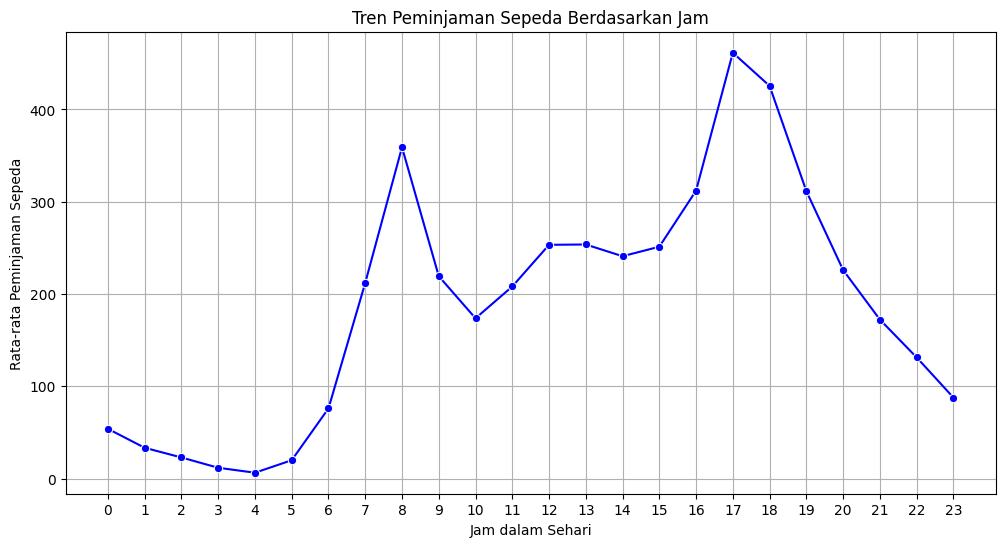

In [49]:
plt.figure(figsize=(12,6))
sns.lineplot(x=all_data.groupby("hr")["cnt_hourly"].mean().index,
             y=all_data.groupby("hr")["cnt_hourly"].mean().values,
             marker="o", color="b")
plt.xticks(range(24))
plt.title("Tren Peminjaman Sepeda Berdasarkan Jam")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.grid()
plt.show()


- Dari visualisasi dapat dilihat bahwa rata-rata peminjam sepeda tertinggi terjadi di jam 17 / 5 sore
- Rata-rata peminjam sepeda terendah terjadi di jam 4 dini hari

### Pertanyaan 2:
Bagaimana pola penyewaan sepeda berdasarkan musim dan cuaca?

<ipython-input-58-efd9f8ab7ab9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_rentals = all_data.groupby("season_hour")["cnt_hourly"].mean()
<ipython-input-58-efd9f8ab7ab9>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_rentals = all_data.groupby("weathersit_hour")["cnt_hourly"].mean()


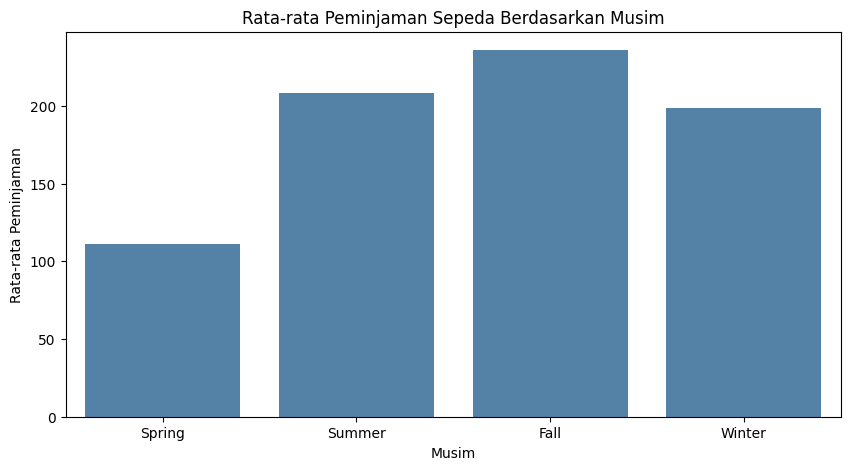

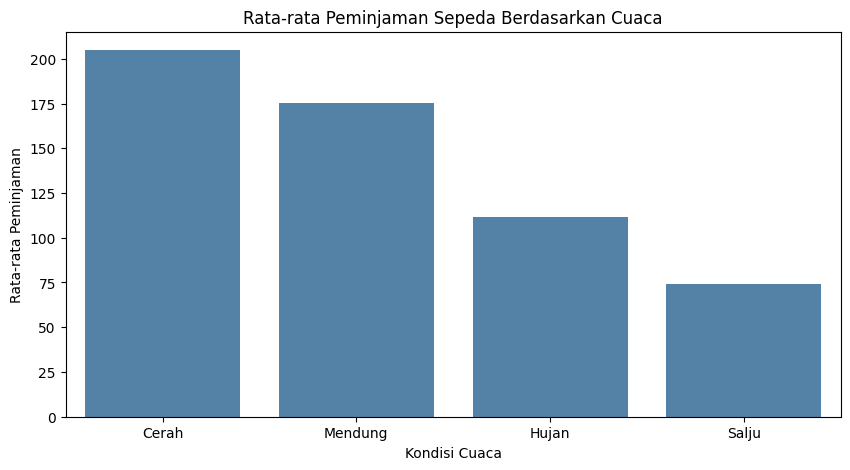

In [58]:
season_rentals = all_data.groupby("season_hour")["cnt_hourly"].mean()
weather_rentals = all_data.groupby("weathersit_hour")["cnt_hourly"].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=season_rentals.index, y=season_rentals.values, color="steelblue")  # Warna seragam
plt.title("Rata-rata Peminjaman Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Peminjaman")
plt.xticks(ticks=[0,1,2,3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=weather_rentals.index, y=weather_rentals.values, color="steelblue")  # Warna seragam
plt.title("Rata-rata Peminjaman Sepeda Berdasarkan Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Peminjaman")
plt.xticks(ticks=[0,1,2,3], labels=["Cerah", "Mendung", "Hujan", "Salju"])
plt.show()

- Spring (Musim Semi) memiliki rata-rata peminjaman terendah, sekitar 110 peminjaman per jam.
- Fall (Musim Gugur) memiliki rata-rata peminjaman tertinggi, lebih dari 220 peminjaman per jam.
- Summer (Musim Panas) dan Winter (Musim Dingin) memiliki jumlah peminjaman yang cukup tinggi, tetapi lebih rendah dari Fall.
- Cuaca Cerah memiliki rata-rata peminjaman tertinggi (sekitar 200 peminjaman per jam).
- Cuaca Mendung juga cukup tinggi, tetapi sedikit lebih rendah dari Cerah (sekitar 180 peminjaman per jam).
- Cuaca Hujan menyebabkan penurunan peminjaman (sekitar 110 peminjaman per jam).
- Cuaca Bersalju memiliki rata-rata peminjaman terendah (sekitar 75 peminjaman per jam).

###Pertanyaan 3 :
Bagaimana pengaruh hari kerja vs hari libur terhadap jumlah penyewaan sepeda?


<ipython-input-59-62953d951c7d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workday_rentals = all_data.groupby("workingday_hour")["cnt_hourly"].mean()


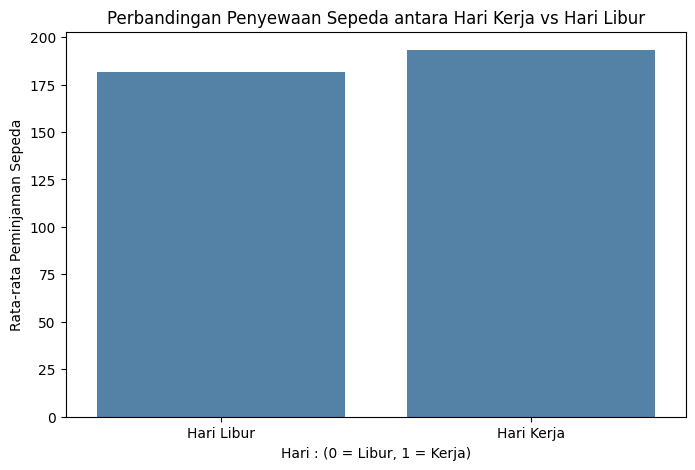

In [59]:
workday_rentals = all_data.groupby("workingday_hour")["cnt_hourly"].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=workday_rentals.index, y=workday_rentals.values, color="steelblue")  # Warna seragam
plt.title("Perbandingan Penyewaan Sepeda antara Hari Kerja vs Hari Libur")
plt.xlabel("Hari : (0 = Libur, 1 = Kerja)")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.xticks(ticks=[0,1], labels=["Hari Libur", "Hari Kerja"])
plt.show()

- Hari Kerja (1) memiliki rata-rata peminjaman lebih tinggi dibandingkan dengan hari libur (0).
- Hari Libur memiliki jumlah peminjaman yang lebih rendah, tetapi tidak jauh berbeda dari hari kerja.


###Pertanyaan 4 :
Apakah ada hubungan antara suhu, kelembapan, dan kecepatan angin terhadap jumlah peminjaman sepeda?


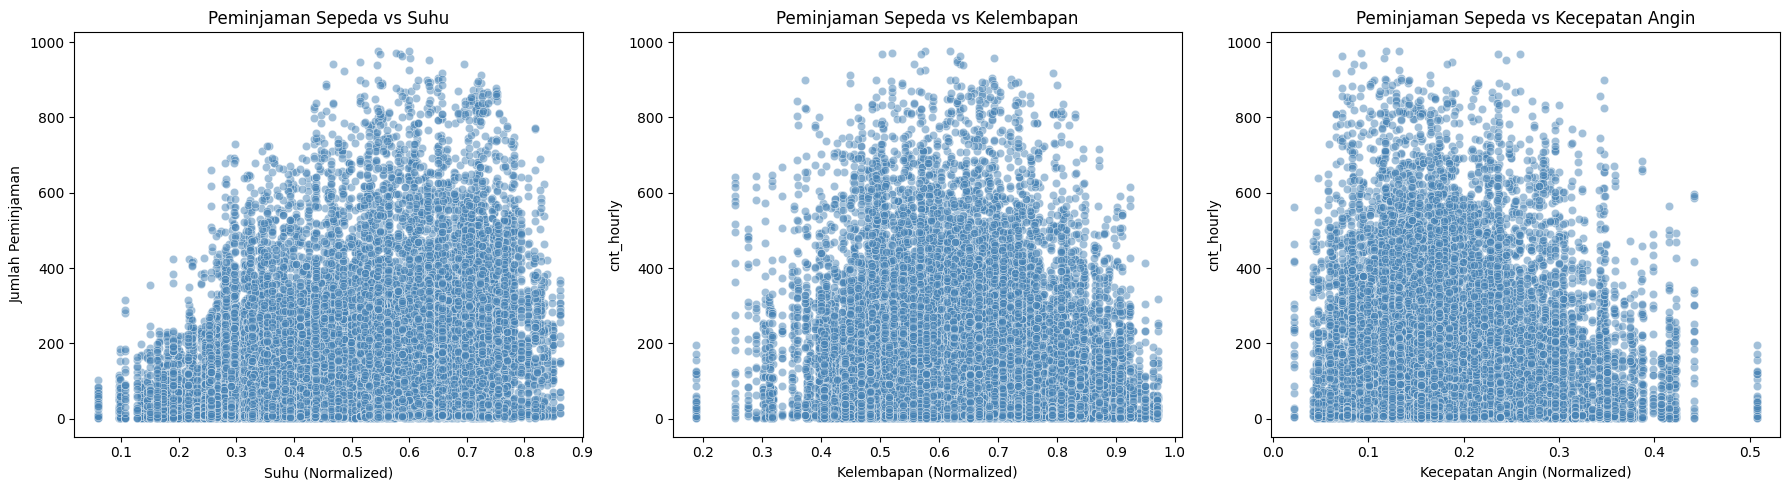

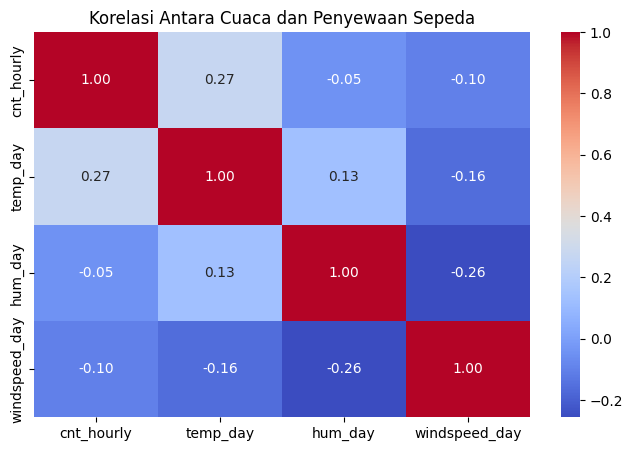

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(ax=axes[0], x=all_data["temp_day"], y=all_data["cnt_hourly"], alpha=0.5, color="steelblue")
axes[0].set_title("Peminjaman Sepeda vs Suhu")
axes[0].set_xlabel("Suhu (Normalized)")
axes[0].set_ylabel("Jumlah Peminjaman")

sns.scatterplot(ax=axes[1], x=all_data["hum_day"], y=all_data["cnt_hourly"], alpha=0.5, color="steelblue")
axes[1].set_title("Peminjaman Sepeda vs Kelembapan")
axes[1].set_xlabel("Kelembapan (Normalized)")

sns.scatterplot(ax=axes[2], x=all_data["windspeed_day"], y=all_data["cnt_hourly"], alpha=0.5, color="steelblue")
axes[2].set_title("Peminjaman Sepeda vs Kecepatan Angin")
axes[2].set_xlabel("Kecepatan Angin (Normalized)")

plt.tight_layout()
plt.show()

correlation_matrix = all_data[["cnt_hourly", "temp_day", "hum_day", "windspeed_day"]].corr()
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antara Cuaca dan Penyewaan Sepeda")
plt.show()

- Suhu sedikit berpengaruh terhadap jumlah penyewaan sepeda (0.27), artinya saat suhu naik, jumlah penyewaan sedikit meningkat.
- Kelembapan dan kecepatan angin hampir tidak berpengaruh terhadap penyewaan sepeda (-0.05 dan -0.10).
- Kecepatan angin dan kelembapan memiliki korelasi negatif sedang (-0.26), yang berarti saat angin bertiup lebih kencang, kelembapan cenderung lebih rendah.

## Analisis Lanjutan (Opsional)

###Time Series Analisys



In [53]:
all_data.head()

,instant,dteday,season_hour,yr,mnth,hr,holiday_hour,weekday,workingday_hour,weathersit_hour,...,cnt_hourly,season_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,holiday_day,workingday_day,cnt_daily
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,16,1,2,0.344167,0.363625,0.805833,0.160446,0,0,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,40,1,2,0.344167,0.363625,0.805833,0.160446,0,0,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,32,1,2,0.344167,0.363625,0.805833,0.160446,0,0,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,13,1,2,0.344167,0.363625,0.805833,0.160446,0,0,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,1,1,2,0.344167,0.363625,0.805833,0.160446,0,0,985


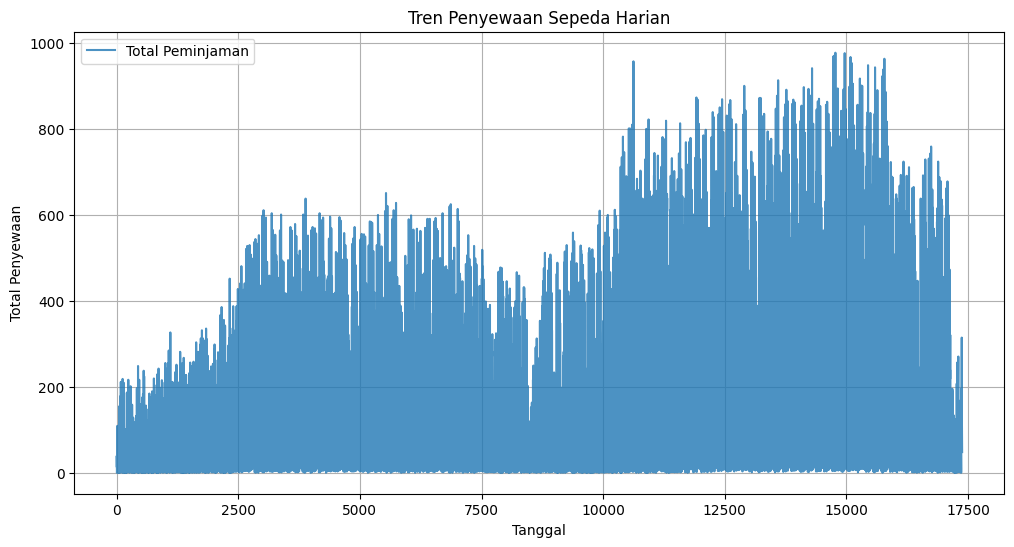

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(all_data.index, all_data['cnt_hourly'], label='Total Peminjaman', color='#1f77b4', alpha=0.8)
plt.xlabel("Tanggal")
plt.ylabel("Total Penyewaan")
plt.title("Tren Penyewaan Sepeda Harian")
plt.legend()
plt.grid()
plt.show()

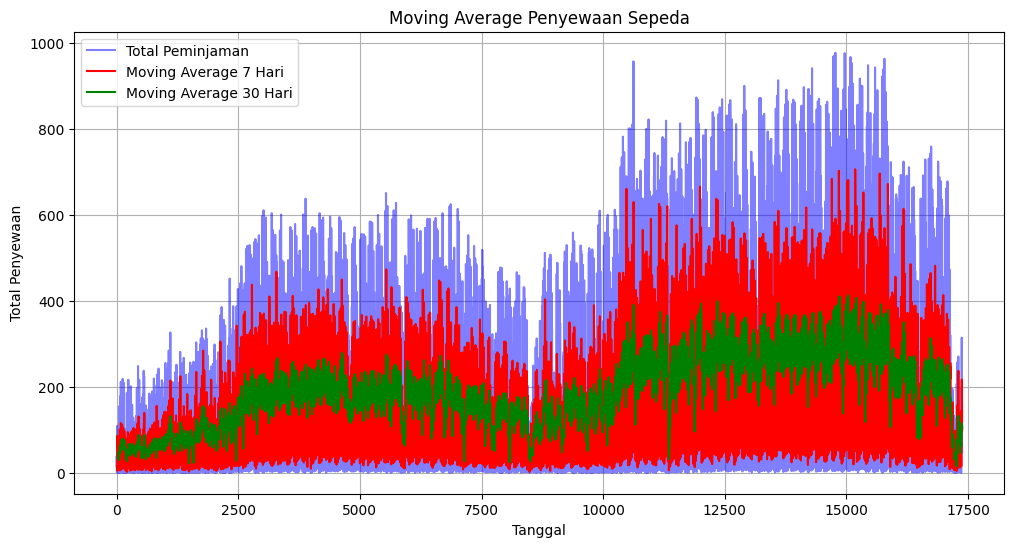

In [55]:
all_data['MA_7'] = all_data['cnt_hourly'].rolling(window=7).mean()
all_data['MA_30'] = all_data['cnt_hourly'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(all_data.index, all_data['cnt_hourly'], label='Total Peminjaman', color='blue', alpha=0.5)
plt.plot(all_data.index, all_data['MA_7'], label='Moving Average 7 Hari', color='red')
plt.plot(all_data.index, all_data['MA_30'], label='Moving Average 30 Hari', color='green')
plt.xlabel("Tanggal")
plt.ylabel("Total Penyewaan")
plt.title("Moving Average Penyewaan Sepeda")
plt.legend()
plt.grid()
plt.show()

In [56]:
# Install library jika belum ada
!pip install statsmodels

from statsmodels.tsa.seasonal import seasonal_decompose

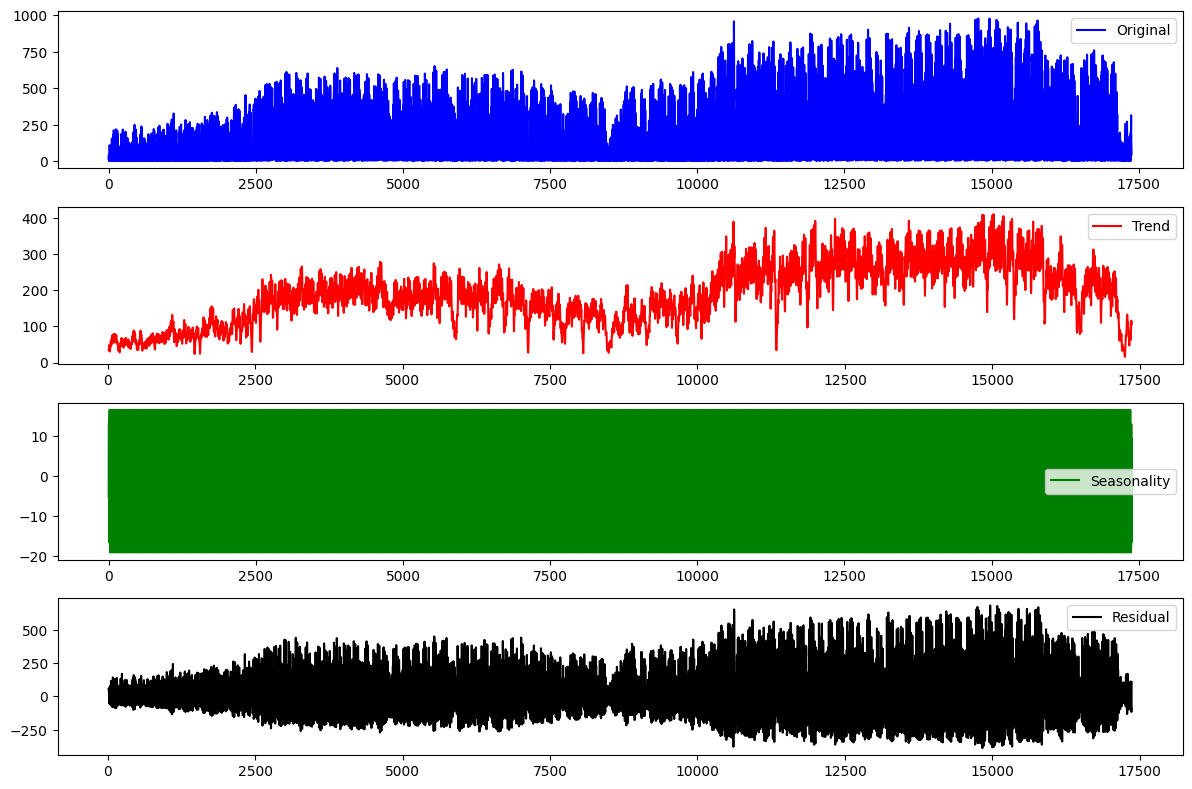

In [57]:
decomposition = seasonal_decompose(all_data['cnt_hourly'], model='additive', period=30)

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(all_data['cnt_hourly'], label='Original', color='blue')
plt.legend()
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='red')
plt.legend()
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.legend()
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='black')
plt.legend()
plt.tight_layout()
plt.show()

**Insight**

Jumlah penyewaan sepeda cenderung meningkat seiring waktu, meskipun ada fluktuasi yang bisa dipengaruhi oleh faktor musiman, cuaca, atau kebijakan tertentu. Pola berulang terlihat dalam periode tertentu, dengan tren jangka pendek dan panjang yang bisa diamati melalui Moving Average

## Conclusion

- Puncak peminjaman terjadi di jam sibuk pagi (08:00) dan sore (17:00-18:00) dan paling tertinggi di jam 17 (5 sore)

- Peminjaman sepeda cenderung lebih rendah di Spring. Mungkin karena cuaca masih dingin atau hujan. Peminjaman paling tinggi di Fall, kemungkinan karena cuaca lebih nyaman untuk bersepeda dibanding musim lainnya.

- Peminjaman sepeda paling tinggi saat cuaca cerah, yang masuk akal karena kondisi ini ideal untuk bersepeda.Salju memiliki peminjaman paling sedikit, kemungkinan karena suhu dingin dan kondisi jalan yang licin membuat orang enggan bersepeda

- Sepeda lebih banyak digunakan pada hari kerja, kemungkinan karena digunakan untuk keperluan transportasi seperti pergi ke kantor atau sekolah.
Pada hari libur, peminjaman masih cukup tinggi, mungkin karena digunakan untuk rekreasi atau aktivitas santai. Perbedaan ini tidak terlalu besar, menunjukkan bahwa sepeda memiliki kegunaan yang cukup fleksibel, baik untuk transportasi maupun rekreasi.

- Suhu memiliki sedikit pengaruh terhadap jumlah penyewaan sepeda, di mana suhu yang lebih tinggi cenderung meningkatkan peminjaman.

Strategi Bisnis :
- Tambahkan lebih banyak sepeda pada jam sibuk (08:00 dan 17:00-18:00), hari kerja, Cuaca Cerah, dan pada saat musim gugur untuk mengakomodasi lonjakan peminjaman
- Berikan promo atau diskon di musim semi untuk meningkatkan minat peminjaman.
- Winter (Musim Dingin & Bersalju - Peminjaman Paling Rendah)
Sediakan sepeda khusus dengan ban anti-selip untuk meningkatkan keamanan